*building a SLP to predict data points*

In [130]:
import numpy as np

w=0.7 # weight
b=0.3 # bias
LR=0.01 # learning rate

x_points = np.linspace(0, 1, 100)
noise = np.random.uniform(-0.05, 0.05,size=x_points.shape)
X = x_points + noise
y = np.where(X < 0.5, 0, 1)

print(X)
print(y)


[ 0.00565108 -0.03709199  0.01131201  0.02478101  0.02211644  0.04324996
  0.05092722  0.05704382  0.09655264  0.06183195  0.06970089  0.11244357
  0.08046917  0.17970194  0.13025542  0.17347236  0.21076335  0.20369716
  0.14964418  0.16491023  0.20069715  0.23361025  0.20585317  0.25812004
  0.23149468  0.23107342  0.27892518  0.25285368  0.27399314  0.31731038
  0.28781278  0.32032298  0.30402372  0.37467393  0.34516968  0.36007694
  0.36436637  0.34127816  0.35175093  0.39664509  0.42297997  0.4010785
  0.46210133  0.44778908  0.39685489  0.42835566  0.45902725  0.49513001
  0.51881934  0.51795978  0.48412117  0.48070221  0.56176487  0.55731082
  0.54995098  0.57193373  0.60603196  0.57027515  0.58614296  0.57958515
  0.63358622  0.58335826  0.65354501  0.65474127  0.68217791  0.66907061
  0.64536771  0.68671924  0.714617    0.65944693  0.75093681  0.69374387
  0.70825611  0.70206696  0.76431801  0.758715    0.81639549  0.81155494
  0.77140662  0.79426708  0.82585395  0.77501336  0.

In [131]:
# creating training, testing sets
X_train=X[:80]
X_test=X[80:]

y_train=y[:80]
y_test=y[80:]

print(X_train)
print(X_test)
print(y_train)
print(y_test)


[ 0.00565108 -0.03709199  0.01131201  0.02478101  0.02211644  0.04324996
  0.05092722  0.05704382  0.09655264  0.06183195  0.06970089  0.11244357
  0.08046917  0.17970194  0.13025542  0.17347236  0.21076335  0.20369716
  0.14964418  0.16491023  0.20069715  0.23361025  0.20585317  0.25812004
  0.23149468  0.23107342  0.27892518  0.25285368  0.27399314  0.31731038
  0.28781278  0.32032298  0.30402372  0.37467393  0.34516968  0.36007694
  0.36436637  0.34127816  0.35175093  0.39664509  0.42297997  0.4010785
  0.46210133  0.44778908  0.39685489  0.42835566  0.45902725  0.49513001
  0.51881934  0.51795978  0.48412117  0.48070221  0.56176487  0.55731082
  0.54995098  0.57193373  0.60603196  0.57027515  0.58614296  0.57958515
  0.63358622  0.58335826  0.65354501  0.65474127  0.68217791  0.66907061
  0.64536771  0.68671924  0.714617    0.65944693  0.75093681  0.69374387
  0.70825611  0.70206696  0.76431801  0.758715    0.81639549  0.81155494
  0.77140662  0.79426708]
[0.82585395 0.77501336 0.7

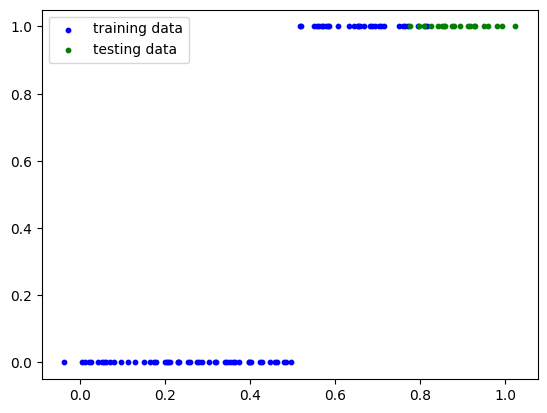

In [138]:
import matplotlib.pyplot as plt

def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
    
    plt.scatter(train_data,train_labels,c='b',s=10,label='training data')
    plt.scatter(test_data,test_labels,c='g',s=10,label='testing data')

    if predictions is not None:
        plt.scatter(test_data,predictions,c='r',s=5,label='predicted data')
    plt.legend()
    plt.show()

plot_predictions()

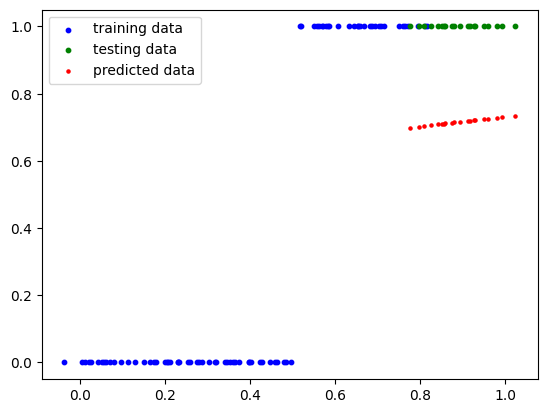

In [139]:
# # before training
z_before_training=w*X_test+b
y_before_training_pred=1/(1+np.exp(-z_before_training))

plot_predictions(predictions=y_before_training_pred)

In [140]:
# MODEL TRAIN
for _ in range(100000):

    z_train=w*X_train+b # forward pass
    y_train_pred=1/(1+np.exp(-z_train)) # activation function
    error=y_train_pred-y_train # loss
    
    # backpropagation
    dl_dw=np.mean(error*X_train)
    dl_db=np.mean(error)

    # weight, bias updation
    w=w-LR*dl_dw
    b=b-LR*dl_db

print(w)
print(b)

16.01909355349401
-8.039271432849116


In [141]:
# TESTING
z_test=w*X_test+b
y_test_pred=1/(1+np.exp(-z_test))

print(y_test)
print(y_test_pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0.99445975 0.98757743 0.99115563 0.99634769 0.9927362  0.99676046
 0.99862947 0.99658532 0.99574308 0.99745537 0.99768073 0.99934109
 0.99812429 0.99890329 0.99954196 0.99872101 0.99894307 0.99923161
 0.99960897 0.99976505]


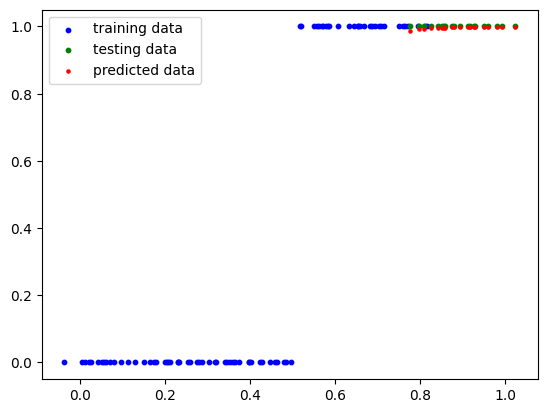

In [142]:
plot_predictions(predictions=y_test_pred)